# **KNN Algorithmn**

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from knn import KNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

### **Load the CSV file into a DataFrame**

In [3]:
data_path = '/home/busenaz/Desktop/Data_Project/FourClassDS.csv'
data = pd.read_csv(data_path)

### **Standardize the features**

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separate features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


### **K-fold Cross-Validation Algortihmn to find optimal k value**

In [5]:
def cross_validation(X, y, num_folds=5, k_values=range(1, 30)):
        
        fold_sizes = int(len(X) / num_folds)
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        
        k_accuracies = {}
        for k in range(1, 30):
            k_accuracies[k] = []  

        k_errors = {}
        for k in range(1, 30):
            k_errors[k] = []         

        for fold in range(num_folds):
            # Create train and test indices for the fold
            test_indices = indices[fold * fold_sizes:(fold + 1) * fold_sizes]
            train_indices = np.delete(indices, np.arange(fold * fold_sizes, (fold + 1) * fold_sizes))
            
            # Split the dataset into a train and test set
            X_train, X_test = X[train_indices], X[test_indices]
            y_train, y_test = y[train_indices], y[test_indices]
            
            # Test each k value
            for k in k_values:
                knn = KNN(k)
                knn.fit(X_train, y_train)
                predictions = knn.predict(X_test)
                accuracy = accuracy_score(y_test, predictions)
                k_accuracies[k].append(accuracy)
                k_errors[k].append(1 - accuracy) 

        
        for k in k_values:
            k_accuracies[k] = np.mean(k_accuracies[k])
            k_errors[k] = np.mean(k_errors[k])
        
        best_k = max(k_accuracies, key=k_accuracies.get)

    # Plot the results for accuracy
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)  # First subplot for accuracy
        plt.plot(list(k_accuracies.keys()), list(k_accuracies.values()), marker='o', color='b')
        plt.xlabel('Number of Neighbors: k')
        plt.ylabel('Average Accuracy')
        plt.title('K-Value vs Accuracy')
        plt.grid(True)

        # Plot the results for error
        plt.subplot(1, 2, 2)  # Second subplot for error
        plt.plot(list(k_errors.keys()), list(k_errors.values()), marker='o', color='r')
        plt.xlabel('Number of Neighbors: k')
        plt.ylabel('Average Validation Error')
        plt.title('K-Value vs Validation Error')
        plt.grid(True)
        
        plt.show()
        return best_k, k_accuracies[best_k], k_accuracies

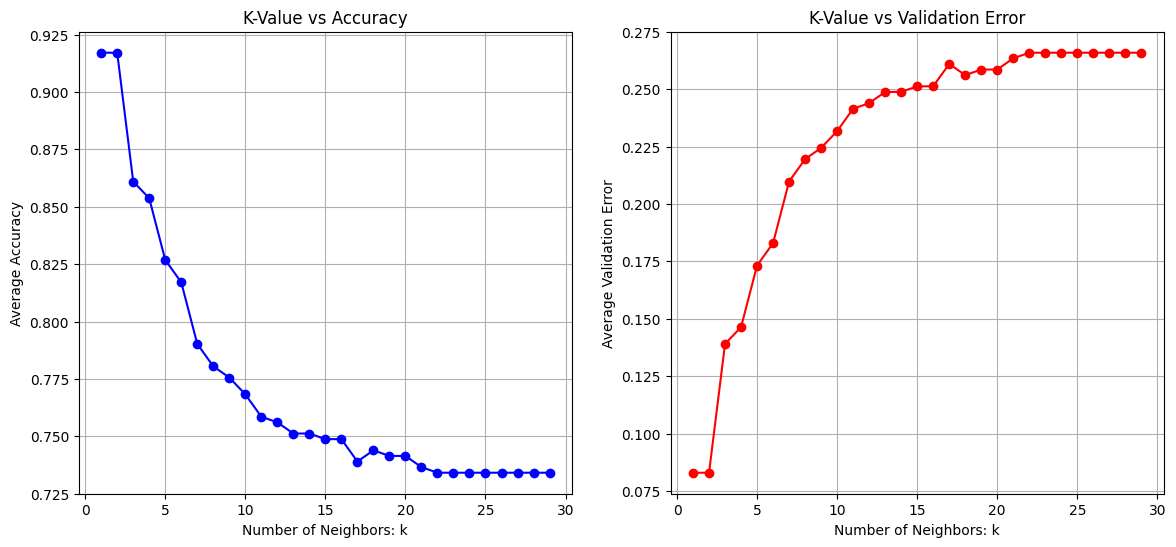

Best k: 1 with Accuracy: 0.92


In [6]:
best_k, best_accuracy, all_accuracies = cross_validation(X, y)
print(f"Best k: {best_k} with Accuracy: {best_accuracy:.2f}")

In [7]:
knn = KNN(best_k)
knn.fit(X_train, y_train)


### **Print each class prediction**

In [8]:
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

print(train_predictions)
print(test_predictions)

[0, 1, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 3, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 3, 1, 1, 1, 2, 1, 2, 3, 3, 0, 0, 0, 1, 1, 1, 2, 1, 1, 3, 1, 0, 2, 1, 3, 3, 3, 1, 1, 0, 3, 1, 3, 3, 0, 2, 0, 1, 1, 1, 1, 1, 0, 3, 3, 0, 2, 3, 2, 3, 3, 1, 0, 0, 3, 0, 3, 0, 1, 3, 0, 3, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 0, 1, 3, 3, 1, 1, 0, 1, 0, 3, 0, 2, 2, 3, 2, 1, 2, 3, 2, 3, 0, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 3, 0, 0, 1, 3, 0, 1, 1, 3, 1, 3, 0, 0, 2, 2, 1, 0, 2, 0, 2, 3, 2, 3, 2, 1, 0, 0, 2, 3, 1, 3, 1, 2, 1, 3, 0, 2, 0, 2, 1, 1, 2, 1, 3, 2, 0, 3, 0, 2, 2, 3, 0, 0, 0, 1, 1, 1, 0, 3, 1, 0, 1, 2, 0, 3, 1, 0, 2, 2, 1, 0, 0, 1, 3, 1, 0, 0, 0, 1, 1, 0, 2, 0, 3, 0, 2, 1, 3, 0, 3, 2, 1, 1, 1, 0, 0, 3, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 3, 1, 2, 0, 1, 0, 3, 1, 2, 3, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 3, 1, 3, 3, 1, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 3, 0, 3, 3, 0, 0, 0, 2, 2, 0, 3, 3, 3, 1, 1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 3, 1, 0, 2, 2, 2]
[3, 1, 1, 1, 2,

### **Evaluate accuracy score**

In [9]:
print(accuracy_score(y_test, test_predictions))

0.8674698795180723


In [10]:
print(accuracy_score(y_train, train_predictions))

0.9298780487804879


### **Confusion Matrix** 

In [11]:
conf_matrix_train = confusion_matrix(y_train, train_predictions)
conf_matrix_test = confusion_matrix(y_test, test_predictions)


### **Training Results**

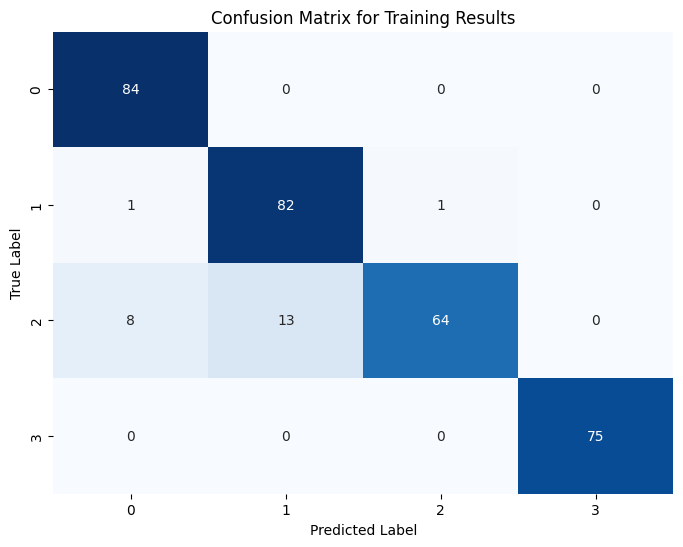

In [12]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Training Results')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
macro_prec = precision_score(y_train, train_predictions, average='macro')
micro_prec = precision_score(y_train, train_predictions, average='micro')

macro_recall = recall_score(y_train, train_predictions, average='macro')
micro_recall = recall_score(y_train, train_predictions, average='micro')

macro_f1 = f1_score(y_train, train_predictions, average='macro')
micro_f1 = f1_score(y_train, train_predictions, average='micro')

print("Precision | Micro: ", micro_prec, " Macro: ", macro_prec)
print("Recall | Micro: ", micro_recall, " Macro: ", macro_recall)
print("F1 Score | Micro: ", micro_f1, " Macro: ", macro_f1)

Precision | Micro:  0.9298780487804879  Macro:  0.93774977145096
Recall | Micro:  0.9298780487804879  Macro:  0.9322829131652661
F1 Score | Micro:  0.9298780487804879  Macro:  0.9296717482561625


### **Testing Results**

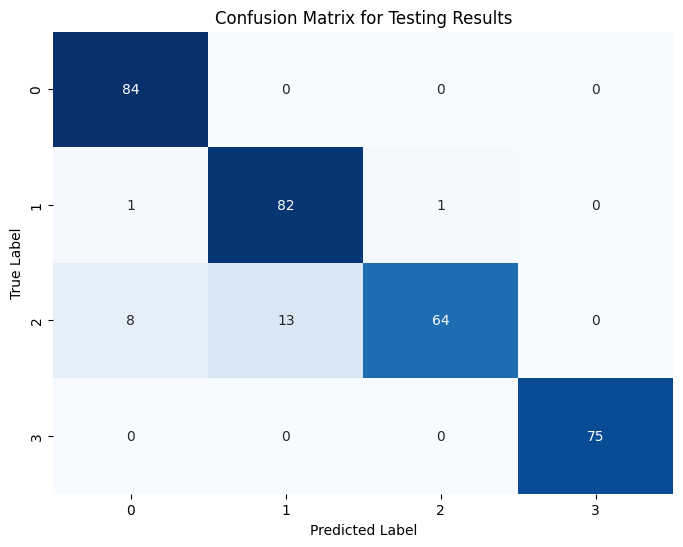

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Testing Results')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
macro_prec = precision_score(y_test, test_predictions, average='macro')
micro_prec = precision_score(y_test, test_predictions, average='micro')

macro_recall = recall_score(y_test, test_predictions, average='macro')
micro_recall = recall_score(y_test, test_predictions, average='micro')

macro_f1 = f1_score(y_test, test_predictions, average='macro')
micro_f1 = f1_score(y_test, test_predictions, average='micro')

print("Precision | Micro: ", micro_prec, " Macro: ", macro_prec)
print("Recall | Micro: ", micro_recall, " Macro: ", macro_recall)
print("F1 Score | Micro: ", micro_f1, " Macro: ", macro_f1)

Precision | Micro:  0.8674698795180723  Macro:  0.8875
Recall | Micro:  0.8674698795180723  Macro:  0.8225892857142857
F1 Score | Micro:  0.8674698795180723  Macro:  0.821969696969697
